In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar2 = pd.read_csv("Solar 2.csv")

In [3]:
solar2

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-06-05 14:00:00,2019,6,5,14,0,Solar2
1,4,0.00,2019-06-05 15:00:00,2019,6,5,15,0,Solar2
2,8,0.00,2019-06-05 16:00:00,2019,6,5,16,0,Solar2
3,12,0.00,2019-06-05 17:00:00,2019,6,5,17,0,Solar2
4,16,0.00,2019-06-05 18:00:00,2019,6,5,18,0,Solar2
...,...,...,...,...,...,...,...,...,...
12341,49364,0.00,2020-10-31 19:00:00,2020,10,31,19,0,Solar2
12342,49368,0.39,2020-10-31 20:00:00,2020,10,31,20,0,Solar2
12343,49372,1.20,2020-10-31 21:00:00,2020,10,31,21,0,Solar2
12344,49376,2.24,2020-10-31 22:00:00,2020,10,31,22,0,Solar2


In [4]:
solar2['datetime']=pd.to_datetime(solar2['datetime'], format='%Y-%m-%d %H:%M:%S')

solar2= solar2.set_index('datetime')

solar2= solar2.asfreq('H') 


<AxesSubplot:xlabel='datetime'>

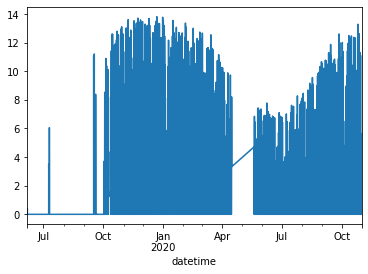

In [5]:
solar2["series_value"].plot()

In [6]:
'''
#Split Train-Val for Solar2
# ==============================================================================
start_train='2019-10-01 00:00'
end_train='2020-04-01 00:00'
start_val='2020-06-01 01:00'
end_val='2020-08-01 00:00'

start_test='2020-08-01 01:00'

'''

end_train='2020-08-01 00:00'
start_test='2020-08-01 01:00'

solar2train = solar2.loc[:end_train,:]
solar2test=solar2.loc[start_test:, :]

In [7]:
solar2train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-06-05 14:00:00,0,0.00,2019,6,5,14,0,Solar2
2019-06-05 15:00:00,4,0.00,2019,6,5,15,0,Solar2
2019-06-05 16:00:00,8,0.00,2019,6,5,16,0,Solar2
2019-06-05 17:00:00,12,0.00,2019,6,5,17,0,Solar2
2019-06-05 18:00:00,16,0.00,2019,6,5,18,0,Solar2
...,...,...,...,...,...,...,...,...
2020-07-31 20:00:00,40536,0.00,2020,7,31,20,0,Solar2
2020-07-31 21:00:00,40540,0.01,2020,7,31,21,0,Solar2
2020-07-31 22:00:00,40544,1.26,2020,7,31,22,0,Solar2


In [8]:
solar2test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-08-01 01:00:00,40556,7.24,2020,8,1,1,0,Solar2
2020-08-01 02:00:00,40560,8.12,2020,8,1,2,0,Solar2
2020-08-01 03:00:00,40564,8.10,2020,8,1,3,0,Solar2
2020-08-01 04:00:00,40568,7.04,2020,8,1,4,0,Solar2
2020-08-01 05:00:00,40572,4.77,2020,8,1,5,0,Solar2
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,49364,0.00,2020,10,31,19,0,Solar2
2020-10-31 20:00:00,49368,0.39,2020,10,31,20,0,Solar2
2020-10-31 21:00:00,49372,1.20,2020,10,31,21,0,Solar2


In [9]:
train_s2 = solar2train.reset_index()[["datetime","series_value"]]
train_s2.columns=["ds","y"]
train_s2

,ds,y
0,2019-06-05 14:00:00,0.00
1,2019-06-05 15:00:00,0.00
2,2019-06-05 16:00:00,0.00
3,2019-06-05 17:00:00,0.00
4,2019-06-05 18:00:00,0.00
...,...,...
10134,2020-07-31 20:00:00,0.00
10135,2020-07-31 21:00:00,0.01
10136,2020-07-31 22:00:00,1.26
10137,2020-07-31 23:00:00,2.46


In [10]:
model_s2 = Prophet()
model_s2.fit(train_s2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s2 = model_s2.make_future_dataframe(periods=2207,freq="H")
future_s2
#end 2020-10-31 23:00:00

,ds
0,2019-06-05 14:00:00
1,2019-06-05 15:00:00
2,2019-06-05 16:00:00
3,2019-06-05 17:00:00
4,2019-06-05 18:00:00
...,...
12341,2020-10-31 19:00:00
12342,2020-10-31 20:00:00
12343,2020-10-31 21:00:00
12344,2020-10-31 22:00:00


In [12]:
forecast_s2 = model_s2.predict(future_s2)
forecast_s2
#forecast_s2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-05 14:00:00,-0.000038,-4.255011,1.221209,-0.000038,-0.000038,-1.500755,-1.500755,-1.500755,-1.567061,-1.567061,-1.567061,0.066306,0.066306,0.066306,0.0,0.0,0.0,-1.500792
1,2019-06-05 15:00:00,-0.000044,-4.240284,1.423185,-0.000044,-0.000044,-1.474497,-1.474497,-1.474497,-1.544074,-1.544074,-1.544074,0.069577,0.069577,0.069577,0.0,0.0,0.0,-1.474541
2,2019-06-05 16:00:00,-0.000051,-4.338520,1.299605,-0.000051,-0.000051,-1.418492,-1.418492,-1.418492,-1.491288,-1.491288,-1.491288,0.072797,0.072797,0.072797,0.0,0.0,0.0,-1.418542
3,2019-06-05 17:00:00,-0.000057,-4.097317,1.342184,-0.000057,-0.000057,-1.412416,-1.412416,-1.412416,-1.488322,-1.488322,-1.488322,0.075905,0.075905,0.075905,0.0,0.0,0.0,-1.412473
4,2019-06-05 18:00:00,-0.000063,-4.133285,1.412155,-0.000063,-0.000063,-1.467052,-1.467052,-1.467052,-1.545894,-1.545894,-1.545894,0.078842,0.078842,0.078842,0.0,0.0,0.0,-1.467115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,2020-10-31 19:00:00,-2.334270,-7.314188,-0.945240,-3.884934,-0.869673,-1.592953,-1.592953,-1.592953,-1.539884,-1.539884,-1.539884,-0.053069,-0.053069,-0.053069,0.0,0.0,0.0,-3.927224
12342,2020-10-31 20:00:00,-2.335492,-6.568990,-0.780718,-3.886806,-0.870105,-1.325743,-1.325743,-1.325743,-1.272033,-1.272033,-1.272033,-0.053710,-0.053710,-0.053710,0.0,0.0,0.0,-3.661235
12343,2020-10-31 21:00:00,-2.336714,-6.103152,0.159858,-3.888678,-0.870538,-0.669283,-0.669283,-0.669283,-0.614643,-0.614643,-0.614643,-0.054640,-0.054640,-0.054640,0.0,0.0,0.0,-3.005997
12344,2020-10-31 22:00:00,-2.337935,-5.216846,0.949228,-3.890550,-0.870971,0.326863,0.326863,0.326863,0.382689,0.382689,0.382689,-0.055826,-0.055826,-0.055826,0.0,0.0,0.0,-2.011072


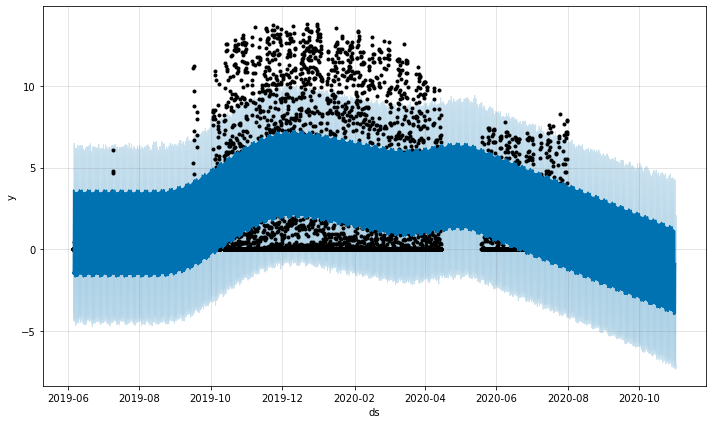

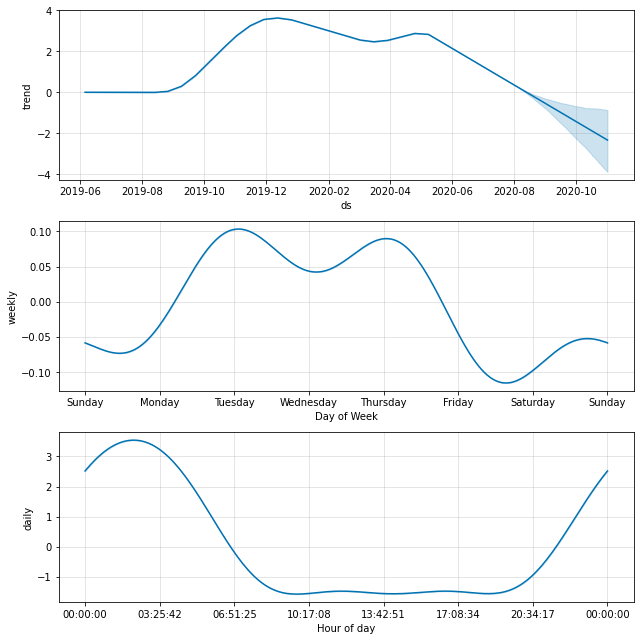

In [13]:
# plot the prediction 
fig= model_s2.plot(forecast_s2)
#plot predictions 
fig= model_s2.plot_components(forecast_s2)

In [14]:
forecast_s2["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s2["additive_terms"])
print(additive_terms)

solar2["series_value"]
actual_value = pd.DataFrame(solar2.reset_index()["series_value"])
actual_value
print(actual_value)

       additive_terms
0           -1.500755
1           -1.474497
2           -1.418492
3           -1.412416
4           -1.467052
...               ...
12341       -1.592953
12342       -1.325743
12343       -0.669283
12344        0.326863
12345        1.453633

[12346 rows x 1 columns]
       series_value
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
...             ...
12341          0.00
12342          0.39
12343          1.20
12344          2.24
12345          5.64

[12346 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar2.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s2["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-06-05 14:00:00,1.500755,-1.500755,0.00
1,2019-06-05 15:00:00,1.474497,-1.474497,0.00
2,2019-06-05 16:00:00,1.418492,-1.418492,0.00
3,2019-06-05 17:00:00,1.412416,-1.412416,0.00
4,2019-06-05 18:00:00,1.467052,-1.467052,0.00
...,...,...,...,...
12341,2020-10-31 19:00:00,1.592953,-1.592953,0.00
12342,2020-10-31 20:00:00,1.715743,-1.325743,0.39
12343,2020-10-31 21:00:00,1.869283,-0.669283,1.20
12344,2020-10-31 22:00:00,1.913137,0.326863,2.24


In [16]:
output.to_csv("s2_actual_additive.csv",index=False)